In [3]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Desktop/julia_codes/GaussianExpansionCavityMethod.jl/examples/BouchaudMezard`


In [4]:
using Revise 
using Random, Graphs, GaussianExpansionCavityMethod, SparseArrays, LinearAlgebra, DifferentialEquations, DifferentialEquations.EnsembleAnalysis
import PyPlot as plt

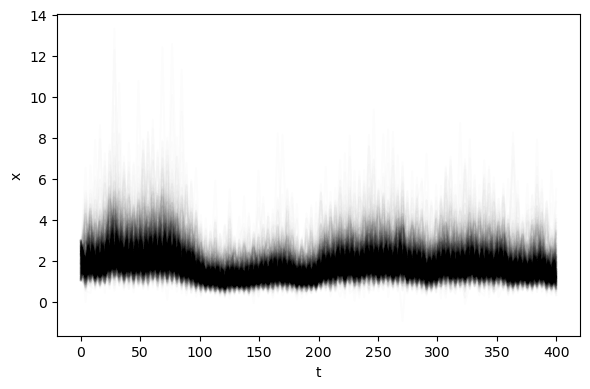

In [34]:
N, K = 1000, 10

rng = Xoshiro()

J = adjacency_matrix(random_regular_graph(N, K; rng=rng)) .* 0.3
@inbounds @fastmath for i in 1:N
    J[i, i] = - 0.3 * K
end
sigma = 1.0

model = BMModel(K, J, sigma)

x0_min, x0_max = 1.0, 3.0
x0 = rand(rng, N) .* (x0_max - x0_min) .+ x0_min
tmax = 400.0 
tsave=collect(range(0.0, tmax; length=100))

tvec, trajs = sample_BM(model, x0, tmax, tsave; rng=rng)

fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=true)
for i in 1:N
    ax.plot(tvec, view(trajs, i, :), color="k", alpha=0.01)
end
ax.set_xlabel("t")
ax.set_ylabel("x")

display(fig)

In [49]:
N, K = 400, 3

rng = Xoshiro(1234) 

J = adjacency_matrix(random_regular_graph(N, K; rng=rng)) .* 1.2 
lambda, D, u = 0.5, 0.2, 0.02

model = Phi4Model(K, J, lambda, D, u)

x0_min, x0_max = 15.0, 28.0
tmax = 0.5
tsave = collect(range(0.0, tmax; length=100));

In [52]:
# Define ensemble model
model_ensemble = Phi4ModelRRG(N, K, 1.2, lambda, D, u)

# Sample ensemble
tvals_alls, traj_alls = sample_ensemble_phi4(model_ensemble, x0_min, x0_max, tmax, tsave, 100; rng=Xoshiro(1234), diverging_threshold=1e6, showprogress=true);

Progress: 100%|███████████████████████████| Time: 0:00:03 (31.86 ms/it)


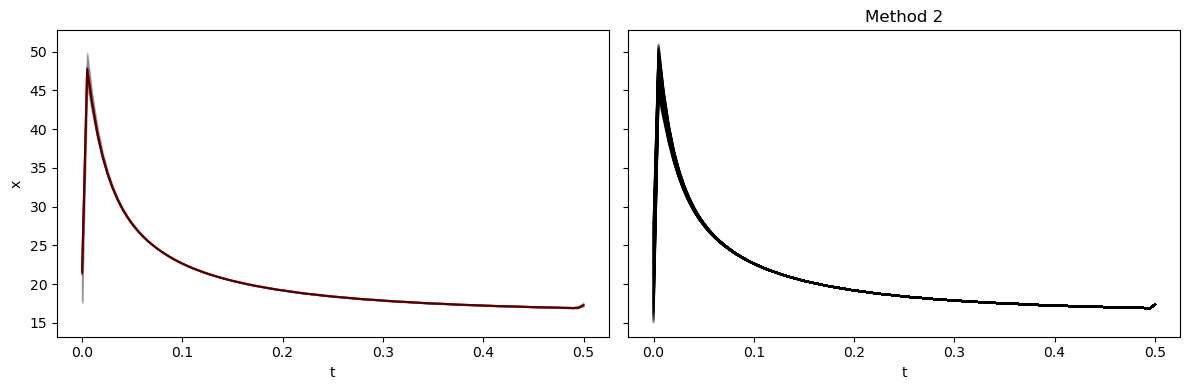

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(6*2, 4), tight_layout=true, sharey=true)
# Only averages
ax = axs[1]
mean_traj, std_traj, autocorr_traj = compute_stats(traj_alls)
ax.plot(tvals_alls[1], mean_traj, color="red")
ax.fill_between(tvals_alls[1], mean_traj .- std_traj, mean_traj .+ std_traj, color="red", alpha=0.1)
for isim in 1:10
    mean, std, autocorr = compute_stats(traj_alls[isim])
    ax.plot(tvals_alls[isim], mean, color="k", alpha=0.1)
    ax.fill_between(tvals_alls[isim], mean .- std, mean .+ std, color="gray", alpha=0.1)
end
ax.set_xlabel("t")
ax.set_ylabel("x")
# Method 2
ax = axs[2]
ax.set_title("Method 2")
for isim in [2]
    for i in 1:N
        ax.plot(tvals_alls[isim], view(traj_alls[isim],i,:), color="k", alpha=0.05)
    end
end
ax.set_xlabel("t")

plt.display(fig)